# Proyek Analisis Data: Bike-Sharing-Dataset


*   **Nama:** Muhamad Faqih
*   **Email:**faqihmuh2005@gmail.com
*   **ID Dicoding:** 3694718


## Menentukan Pertanyaan Bisnis

*   Apa pengaruh cuaca (weather_condition) terhadap jumlah penyewaan sepeda (total_rentals)?

*   Bagaimana pola penyewaan sepeda berubah sepanjang hari (hour) antara pengguna kasual dan pengguna terdaftar?


## Import Semua Packages/Library yang Digunakan

In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

In [507]:
df_day = pd.read_csv('/content/data_1.csv')
df_hour = pd.read_csv('/content/data_2.csv')

print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [508]:
# Menggabungkan dataset berdasarkan kolom 'dteday'
merged_df = pd.merge(df_day, df_hour, on='dteday', suffixes=('_x', '_y'))

# Daftar kolom yang sama di kedua dataset
common_columns = {'instant', 'season', 'mnth', 'holiday', 'weathersit', 'weekday',
                  'atemp', 'yr', 'registered', 'dteday', 'hum', 'temp',
                  'workingday', 'casual', 'cnt', 'windspeed'}

# Hapus kolom duplikasi (_y) dan hapus sufiks _x dari nama kolom
bikes_df = merged_df.drop(columns=[col + '_y' for col in common_columns if col + '_y' in merged_df.columns])
bikes_df.columns = [col.replace('_x', '') for col in bikes_df.columns]

# Tampilan hasil dataset yang sudah bersih
print(bikes_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        1  2011-01-01       1   0     1        0        6           0   
2        1  2011-01-01       1   0     1        0        6           0   
3        1  2011-01-01       1   0     1        0        6           0   
4        1  2011-01-01       1   0     1        0        6           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.344167  0.363625  0.805833   0.160446     331         654   
2           2  0.344167  0.363625  0.805833   0.160446     331         654   
3           2  0.344167  0.363625  0.805833   0.160446     331         654   
4           2  0.344167  0.363625  0.805833   0.160446     331         654   

   cnt  hr  
0  985   0  
1  985   1  
2  985   2  
3  985   3  
4  985   4  


In [509]:
# Simpan dataset gabungan day_csv dan hour_csv
bikes_df.to_csv('gabungan_data_bike_sharing.csv')
print(bikes_df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        1  2011-01-01       1   0     1        0        6           0   
2        1  2011-01-01       1   0     1        0        6           0   
3        1  2011-01-01       1   0     1        0        6           0   
4        1  2011-01-01       1   0     1        0        6           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.344167  0.363625  0.805833   0.160446     331         654   
2           2  0.344167  0.363625  0.805833   0.160446     331         654   
3           2  0.344167  0.363625  0.805833   0.160446     331         654   
4           2  0.344167  0.363625  0.805833   0.160446     331         654   

   cnt  hr  
0  985   0  
1  985   1  
2  985   2  
3  985   3  
4  985   4  


**Insight:**

*   Membaca dataset menggunakan pandas
*   menggabungkan 2 file menjadi 1 dataset bernama gabungan_data_bike_sharing.csv





### Assesing Data

In [510]:
# membaca data dan mencari tipe data
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
 16  hr          17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [511]:
# Ubah nama kolom agar lebih deskriptif
bikes_df.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temp',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_rentals'
}, inplace=True)
# menampilkan hasil
print(bikes_df.head())




   record_id        date  season  year  month  is_holiday  day_of_week  \
0          1  2011-01-01       1     0      1           0            6   
1          1  2011-01-01       1     0      1           0            6   
2          1  2011-01-01       1     0      1           0            6   
3          1  2011-01-01       1     0      1           0            6   
4          1  2011-01-01       1     0      1           0            6   

   is_working_day  weather_condition  temperature  feels_like_temp  humidity  \
0               0                  2     0.344167         0.363625  0.805833   
1               0                  2     0.344167         0.363625  0.805833   
2               0                  2     0.344167         0.363625  0.805833   
3               0                  2     0.344167         0.363625  0.805833   
4               0                  2     0.344167         0.363625  0.805833   

   wind_speed  casual_users  registered_users  total_rentals  hour  
0    

In [512]:
# mengubah tipe data
bikes_df['season'] = bikes_df['season'].astype('int')
bikes_df['year'] = bikes_df['year'].astype('int')
bikes_df['month'] = bikes_df['month'].astype('int')
bikes_df['date'] = pd.to_datetime(bikes_df['date'])
print(bikes_df.dtypes)

record_id                     int64
date                 datetime64[ns]
season                        int64
year                          int64
month                         int64
is_holiday                    int64
day_of_week                   int64
is_working_day                int64
weather_condition             int64
temperature                 float64
feels_like_temp             float64
humidity                    float64
wind_speed                  float64
casual_users                  int64
registered_users              int64
total_rentals                 int64
hour                          int64
dtype: object


In [513]:
# Memisahkan kolom numerik
kolom_numerik = ["temperature", "feels_like_temp", "humidity", "wind_speed", "casual_users", "registered_users", "total_rentals", "recency"]

# Memisahkan kolom kategorikal
kolom_kategorik = ["season", "weather_condition", "day_of_week", "is_holiday", "is_working_day"]

# Memisahkan kolom waktu
kolom_waktu = ["date", "year", "month", "hour"]

# Menampilkan kolom berdasarkan kategorinya
print("Kolom Numerik:", kolom_numerik)
print("Kolom Kategorikal:", kolom_kategorik)
print("Kolom Waktu:", kolom_waktu)


Kolom Numerik: ['temperature', 'feels_like_temp', 'humidity', 'wind_speed', 'casual_users', 'registered_users', 'total_rentals', 'recency']
Kolom Kategorikal: ['season', 'weather_condition', 'day_of_week', 'is_holiday', 'is_working_day']
Kolom Waktu: ['date', 'year', 'month', 'hour']


In [514]:
# Memeriksa nilai unik dalam kolom yang relevan
print(bikes_df['is_holiday'].unique())  # terdiri 0,1
print(bikes_df['day_of_week'].unique())  # terdiri nilai antara 0 hingga 6
print(bikes_df['season'].unique())  # Pastikan nilainya antara 1 hingga 4
print(bikes_df['weather_condition'].unique())  # terdiri 1 hingga 3
print(bikes_df['year'].unique()) # terdiri 0 dan 1
print(bikes_df['is_working_day'].unique()) # terdiri 0 dan 1



[0 1]
[6 0 1 2 3 4 5]
[1 2 3 4]
[2 1 3]
[0 1]
[0 1]


In [515]:
# Hitung jumlah nilai unik di setiap kolom
unique_counts = bikes_df.nunique()
total_counts = len(bikes_df)
print(unique_counts)
print(total_counts)

record_id            731
date                 731
season                 4
year                   2
month                 12
is_holiday             2
day_of_week            7
is_working_day         2
weather_condition      3
temperature          499
feels_like_temp      690
humidity             595
wind_speed           650
casual_users         606
registered_users     679
total_rentals        696
hour                  24
dtype: int64
17379


In [516]:
# Mapping untuk kolom season
season_mapping = {1: "Spring", 2: "Summer", 3: "Autumn", 4: "Winter"}
bikes_df['season'] = bikes_df['season'].map(season_mapping)

# Mapping untuk kolom weather_condition
weather_mapping = {1: "Clear", 2: "Cloudy", 3: "Rainy"}
bikes_df['weather_condition'] = bikes_df['weather_condition'].map(weather_mapping)

# Mapping untuk kolom is_working_day
working_day_mapping = {0: "Non-Working Day", 1: "Working Day"}
bikes_df['is_working_day'] = bikes_df['is_working_day'].map(working_day_mapping)

# Periksa hasil mapping untuk setiap kolom secara terpisah
print("Season values:", bikes_df['season'].unique())
print("Weather Condition values:", bikes_df['weather_condition'].unique())
print("Is Working Day values:", bikes_df['is_working_day'].unique())



Season values: ['Spring' 'Summer' 'Autumn' 'Winter']
Weather Condition values: ['Cloudy' 'Clear' 'Rainy']
Is Working Day values: ['Non-Working Day' 'Working Day']


In [517]:
# Mapping untuk kolom 'year' (0 menjadi 2011, 1 menjadi 2012)
year_mapping = {0: 2011, 1: 2012}
bikes_df['year'] = bikes_df['year'].map(year_mapping)

# Mapping untuk kolom 'month' ke nama bulan
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
bikes_df['month'] = bikes_df['month'].map(month_mapping)

# Mapping untuk kolom 'is_holiday'
holiday_mapping = {0: "Non-Holiday", 1: "Holiday"}
bikes_df['is_holiday'] = bikes_df['is_holiday'].map(holiday_mapping)

# Memeriksa hasil mapping pada kolom-kolom yang relevan
print("year_values:", bikes_df['year'].unique())
print("month_values:", bikes_df['month'].unique())
print("is_holiday_values:", bikes_df['is_holiday'].unique())


year_values: [2011 2012]
month_values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
is_holiday_values: ['Non-Holiday' 'Holiday']


In [518]:
# Mapping day_of_Week
day_of_week_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
bikes_df['day_of_week'].unique()
bikes_df['day_of_week'] = bikes_df['day_of_week'].map(day_of_week_mapping)
print(bikes_df['day_of_week'].unique())

['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


In [520]:
# Memeriksa nilai unik pada kolom-kolom yang sudah dimapping
print(bikes_df['season'].unique())
print(bikes_df['weather_condition'].unique())
print(bikes_df['is_working_day'].unique())
print(bikes_df['year'].unique())
print(bikes_df['month'].unique())
print(bikes_df['is_holiday'].unique())



['Spring' 'Summer' 'Autumn' 'Winter']
['Cloudy' 'Clear' 'Rainy']
['Non-Working Day' 'Working Day']
[2011 2012]
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
['Non-Holiday' 'Holiday']


In [521]:
# Menampilkan contoh data untuk satu tanggal
sample_date = bikes_df['date'].iloc[0]
bikes_df[bikes_df['date'] == sample_date]


,record_id,date,season,year,month,is_holiday,day_of_week,is_working_day,weather_condition,temperature,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_rentals,hour
0,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,4
5,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,5
6,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,6
7,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,7
8,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,8
9,1,2011-01-01,Spring,2011,January,Non-Holiday,Saturday,Non-Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,9


**Insight:**


*   Mengubah kolom  data dan nama kolom agar efisien    
*   Memisahkan kolom kategorik dan numerik agar memudahkan analisis



### Cleaning Data

In [522]:
# Penanganan missing value dengan Interpolation
bikes_df['temperature'].interpolate(method='linear', inplace=True)
bikes_df['humidity'].interpolate(method='linear', inplace=True)
bikes_df['wind_speed'].interpolate(method='linear', inplace=True)
print(bikes_df.head())

   record_id       date  season  year    month   is_holiday day_of_week  \
0          1 2011-01-01  Spring  2011  January  Non-Holiday    Saturday   
1          1 2011-01-01  Spring  2011  January  Non-Holiday    Saturday   
2          1 2011-01-01  Spring  2011  January  Non-Holiday    Saturday   
3          1 2011-01-01  Spring  2011  January  Non-Holiday    Saturday   
4          1 2011-01-01  Spring  2011  January  Non-Holiday    Saturday   

    is_working_day weather_condition  temperature  feels_like_temp  humidity  \
0  Non-Working Day            Cloudy     0.344167         0.363625  0.805833   
1  Non-Working Day            Cloudy     0.344167         0.363625  0.805833   
2  Non-Working Day            Cloudy     0.344167         0.363625  0.805833   
3  Non-Working Day            Cloudy     0.344167         0.363625  0.805833   
4  Non-Working Day            Cloudy     0.344167         0.363625  0.805833   

   wind_speed  casual_users  registered_users  total_rentals  hour  

<ipython-input-522-cf50e11dba48>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bikes_df['temperature'].interpolate(method='linear', inplace=True)
<ipython-input-522-cf50e11dba48>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [523]:
# Menangani Outlier
Q1 = bikes_df['total_rentals'].quantile(0.25)
Q3 = bikes_df['total_rentals'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bikes_df = bikes_df[(bikes_df['total_rentals'] >= lower_bound) & (bikes_df['total_rentals'] <= upper_bound)]
print(bikes_df.head())


   record_id       date  season  year    month   is_holiday day_of_week  \
0          1 2011-01-01  Spring  2011  January  Non-Holiday    Saturday   
1          1 2011-01-01  Spring  2011  January  Non-Holiday    Saturday   
2          1 2011-01-01  Spring  2011  January  Non-Holiday    Saturday   
3          1 2011-01-01  Spring  2011  January  Non-Holiday    Saturday   
4          1 2011-01-01  Spring  2011  January  Non-Holiday    Saturday   

    is_working_day weather_condition  temperature  feels_like_temp  humidity  \
0  Non-Working Day            Cloudy     0.344167         0.363625  0.805833   
1  Non-Working Day            Cloudy     0.344167         0.363625  0.805833   
2  Non-Working Day            Cloudy     0.344167         0.363625  0.805833   
3  Non-Working Day            Cloudy     0.344167         0.363625  0.805833   
4  Non-Working Day            Cloudy     0.344167         0.363625  0.805833   

   wind_speed  casual_users  registered_users  total_rentals  hour  

**Insight:**
*   melihat pencilan data yang tersebar
*   menghitung titik data baru berdasarkan range data yang sudah ada  

## Eksploratory Data Analysis (EDA)


### Explore

In [524]:
#Statistik Deskriptif untuk menguji parameter statistik
bikes_df.describe(include = 'all')

,record_id,date,season,year,month,is_holiday,day_of_week,is_working_day,weather_condition,temperature,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_rentals,hour
count,17379.000000,17379,17379,17379.000000,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Autumn,NaN,May,Non-Holiday,Saturday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,16879,2512,11865,11040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,11.546752
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,185.000000,2011-07-04 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,6.000000
50%,367.000000,2012-01-02 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,12.000000
75%,549.000000,2012-07-02 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,18.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,23.000000


In [525]:
# Mengelompokkan data
# Kategori jam operasional (pagi, siang, sore, malam)
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Melihat distribusi kategori jam
bikes_df['hour_category'] = bikes_df['hour'].apply(categorize_hour)
print(bikes_df['hour_category'].value_counts())

hour_category
Afternoon    4375
Evening      4368
Morning      4360
Night        4276
Name: count, dtype: int64


In [526]:
# Menampilkan nilai-nilai unik untuk kolom kategorikal
print(bikes_df['season'].value_counts())
print(bikes_df['weather_condition'].value_counts())
print(bikes_df['day_of_week'].value_counts())

season
Autumn    4496
Summer    4409
Spring    4242
Winter    4232
Name: count, dtype: int64
weather_condition
Clear     11040
Cloudy     5871
Rainy       468
Name: count, dtype: int64
day_of_week
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: count, dtype: int64


In [527]:
# Menampilkan nilai-nilai unik kolom numerik
print(bikes_df['temperature'].value_counts())
print(bikes_df['humidity'].value_counts())
print(bikes_df['wind_speed'].value_counts())

temperature
0.635000    120
0.265833    120
0.564167     96
0.710833     96
0.649167     96
           ... 
0.707059     17
0.216667     12
0.318182     11
0.195000      8
0.440000      1
Name: count, Length: 499, dtype: int64
humidity
0.613333    96
0.630833    72
0.590417    72
0.690000    72
0.570000    72
            ..
0.561765    17
0.861667    12
0.825455    11
0.687500     8
0.880000     1
Name: count, Length: 595, dtype: int64
wind_speed
0.136817    72
0.118792    72
0.166667    72
0.149883    72
0.106350    72
            ..
0.304659    17
0.293850    16
0.213009    11
0.113837     8
0.358200     1
Name: count, Length: 650, dtype: int64


In [528]:
# Frekuensi kategori untuk kolom season
season_counts = bikes_df['season'].value_counts()
print("Frekuensi Kategori untuk Kolom Season:")
print(season_counts)

# Frekuensi kategori untuk kolom weather_condition
weather_condition_counts = bikes_df['weather_condition'].value_counts()
print("\nFrekuensi Kategori untuk Kolom Weather Condition:")
print(weather_condition_counts)

# Frekuensi kategori untuk kolom day_of_week
day_of_week_counts = bikes_df['day_of_week'].value_counts()
print("\nFrekuensi Kategori untuk Kolom Day of Week:")
print(day_of_week_counts)

Frekuensi Kategori untuk Kolom Season:
season
Autumn    4496
Summer    4409
Spring    4242
Winter    4232
Name: count, dtype: int64

Frekuensi Kategori untuk Kolom Weather Condition:
weather_condition
Clear     11040
Cloudy     5871
Rainy       468
Name: count, dtype: int64

Frekuensi Kategori untuk Kolom Day of Week:
day_of_week
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: count, dtype: int64


In [529]:
# Statistik deskriptif untuk kolom numerik (Analisis Univariat)
numerical_columns = ['temperature', 'feels_like_temp', 'humidity', 'wind_speed', 'total_rentals']
print(bikes_df[numerical_columns].describe())


        temperature  feels_like_temp      humidity    wind_speed  \
count  17379.000000     17379.000000  17379.000000  17379.000000   
mean       0.496987         0.475775      0.627229      0.190098   
std        0.182445         0.162426      0.141779      0.077204   
min        0.059130         0.079070      0.000000      0.022392   
25%        0.340000         0.338363      0.520000      0.134950   
50%        0.502500         0.490122      0.625833      0.180967   
75%        0.655833         0.610488      0.729583      0.233204   
max        0.861667         0.840896      0.972500      0.507463   

       total_rentals  
count   17379.000000  
mean     4533.692963  
std      1917.376947  
min        22.000000  
25%      3214.000000  
50%      4563.000000  
75%      5986.000000  
max      8714.000000  


In [530]:
# Rata-rata total_rentals berdasarkan weather_condition (Analisis Bivariat)
weather_avg_rentals = bikes_df.groupby('weather_condition')['total_rentals'].mean()
print(weather_avg_rentals)

# Rata-rata total_rentals berdasarkan day_of_week
day_avg_rentals = bikes_df.groupby('day_of_week')['total_rentals'].mean()
print(day_avg_rentals)


weather_condition
Clear     4895.177083
Cloudy    4062.717595
Rainy     1914.700855
Name: total_rentals, dtype: float64
day_of_week
Friday       4700.838359
Monday       4391.920936
Saturday     4561.544188
Sunday       4239.505995
Thursday     4703.503440
Tuesday      4566.708113
Wednesday    4574.609293
Name: total_rentals, dtype: float64


In [531]:
# Rata-rata total_rentals berdasarkan season
season_avg_rentals = bikes_df.groupby('season')['total_rentals'].mean()
print(season_avg_rentals)

season
Autumn    5654.093194
Spring    2635.348185
Summer    4995.253119
Winter    4765.366021
Name: total_rentals, dtype: float64


In [532]:
# Rata-rata total_rentals berdasarkan kombinasi season, weather_condition, dan day_of_week (Analisis Multivariat)
multivariate_avg_rentals = bikes_df.groupby(['season', 'weather_condition', 'day_of_week'])['total_rentals'].mean()
print(multivariate_avg_rentals)


season  weather_condition  day_of_week
Autumn  Clear              Friday         5890.058824
                           Monday         5595.654292
                           Saturday       5931.058824
                           Sunday         5361.890063
                           Thursday       6318.500000
                                             ...     
Winter  Cloudy             Wednesday      4699.875000
        Rainy              Monday         2655.280000
                           Saturday        627.000000
                           Tuesday        2946.666667
                           Wednesday      1834.357895
Name: total_rentals, Length: 70, dtype: float64


In [533]:
# Tren total_rentals berdasarkan tahun
yearly_trend = bikes_df.groupby('year')['total_rentals'].sum()
print(yearly_trend)


year
2011    29665268
2012    49125782
Name: total_rentals, dtype: int64


In [534]:
# Tren total_rentals berdasarkan bulan
monthly_trend = bikes_df.groupby('month')['total_rentals'].sum()
print(monthly_trend)


month
April        6444110
August       8391628
December     5058558
February     3582161
January      3184341
July         8278752
June         8312208
March        5463600
May          7960464
November     6101439
October      7719270
September    8294519
Name: total_rentals, dtype: int64


In [535]:
# Tren total_rentals berdasarkan hari dalam seminggu
daily_trend = bikes_df.groupby('day_of_week')['total_rentals'].sum()
print(daily_trend)


day_of_week
Friday       11690985
Monday       10887572
Saturday     11458599
Sunday       10607244
Thursday     11622357
Tuesday      11202135
Wednesday    11322158
Name: total_rentals, dtype: int64


In [536]:
# Tren total_rentals berdasarkan jam
hourly_trend = bikes_df.groupby('hour')['total_rentals'].sum()
print(hourly_trend)


hour
0     3284685
1     3281953
2     3261236
3     3217258
4     3235646
5     3273682
6     3285017
7     3290447
8     3290447
9     3290447
10    3290447
11    3290447
12    3291130
13    3292226
14    3292226
15    3292226
16    3292657
17    3292657
18    3291036
19    3291036
20    3291036
21    3291036
22    3291036
23    3291036
Name: total_rentals, dtype: int64


In [537]:
# Tren total_rentals berdasarkan musim
seasonal_trend = bikes_df.groupby('season')['total_rentals'].sum()
print(seasonal_trend)


season
Autumn    25420803
Spring    11179147
Summer    22024071
Winter    20167029
Name: total_rentals, dtype: int64


In [538]:
# Tren total_rentals berdasarkan kondisi cuaca
weather_trend = bikes_df.groupby('weather_condition')['total_rentals'].sum()
print(weather_trend)

weather_condition
Clear     54042755
Cloudy    23852215
Rainy       896080
Name: total_rentals, dtype: int64


In [539]:
# Tren total_rentals berdasarkan hari libur vs hari kerja
holiday_workingday_trend = bikes_df.groupby(['is_holiday', 'is_working_day'])['total_rentals'].sum()
print(holiday_workingday_trend)


is_holiday   is_working_day 
Holiday      Non-Working Day     1875030
Non-Holiday  Non-Working Day    22065843
             Working Day        54850177
Name: total_rentals, dtype: int64


In [540]:
# Menghitung korelasi antar kolom numerik
numerical_columns = ['temperature', 'feels_like_temp', 'humidity', 'wind_speed', 'total_rentals']
correlation_matrix = bikes_df[numerical_columns].corr()

# Menampilkan matriks korelasi
print(correlation_matrix)


                 temperature  feels_like_temp  humidity  wind_speed  \
temperature         1.000000         0.991608  0.131257   -0.161577   
feels_like_temp     0.991608         1.000000  0.144272   -0.187460   
humidity            0.131257         0.144272  1.000000   -0.258150   
wind_speed         -0.161577        -0.187460 -0.258150    1.000000   
total_rentals       0.625232         0.629054 -0.091657   -0.231340   

                 total_rentals  
temperature           0.625232  
feels_like_temp       0.629054  
humidity             -0.091657  
wind_speed           -0.231340  
total_rentals         1.000000  


In [541]:
# Korelasi antara season dan total_rentals (rata-rata per musim)
season_rentals_correlation = bikes_df.groupby('season')['total_rentals'].mean()
print(season_rentals_correlation)

season
Autumn    5654.093194
Spring    2635.348185
Summer    4995.253119
Winter    4765.366021
Name: total_rentals, dtype: float64


In [542]:
# Mengelompokkan data berdasarkan jumlah peminjaman dan waktu
grouped_data = bikes_df.groupby(['hour', 'weather_condition'])['total_rentals'].sum().reset_index()

# Misalkan kita ingin mengelompokkan berdasarkan jumlah peminjaman sepeda
high_demand = grouped_data[grouped_data['total_rentals'] > grouped_data['total_rentals'].quantile(0.75)]
low_demand = grouped_data[grouped_data['total_rentals'] < grouped_data['total_rentals'].quantile(0.25)]

# Menampilkan hasil
print("High Demand Clusters:")
print(high_demand)
print("\nLow Demand Clusters:")
print(low_demand)


High Demand Clusters:
    hour weather_condition  total_rentals
18     6             Clear        2252091
21     7             Clear        2257521
24     8             Clear        2257521
27     9             Clear        2257521
30    10             Clear        2257521
33    11             Clear        2257521
36    12             Clear        2257521
39    13             Clear        2257521
42    14             Clear        2257521
45    15             Clear        2257521
48    16             Clear        2257952
51    17             Clear        2257952
54    18             Clear        2257952
57    19             Clear        2257952
60    20             Clear        2257952
63    21             Clear        2257952
66    22             Clear        2257952
69    23             Clear        2257952

Low Demand Clusters:
    hour weather_condition  total_rentals
5      1             Rainy          35137
8      2             Rainy          36005
11     3             Rainy      

In [543]:
# Menghitung jumlah entri berdasarkan casual dan registered
casual_counts = bikes_df['casual_users'].value_counts()
registered_counts = bikes_df['registered_users'].value_counts()

# Menampilkan hasil
print("Jumlah Entri Berdasarkan Casual Users:")
print(casual_counts)
print("\nJumlah Entri Berdasarkan Registered Users:")
print(registered_counts)


Jumlah Entri Berdasarkan Casual Users:
casual_users
968     96
120     93
653     72
775     72
163     71
        ..
1415    17
34      16
87      11
15       8
2        1
Name: count, Length: 606, dtype: int64

Jumlah Entri Berdasarkan Registered Users:
registered_users
4841    72
6248    72
1707    70
4446    48
2419    48
        ..
2919    17
472     16
1009    11
416      8
20       1
Name: count, Length: 679, dtype: int64


**Insight:**
*   Hari Kerja (Working Day) dan Cuaca Cerah (Clear) mendominasi pemakaian sepeda
*   Autumn dan May adalah waktu yang lebih sering terjadi pemakaian sepeda
*   Frekuensi penggunaan sepeda lebih tinggi pada hari Saturday (Sabtu), yang bisa disebabkan oleh aktivitas rekreasi pada akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Tren hari dalam Seminggu (Day of Week) dan Penyewaan Sepeda?

<ipython-input-544-64cb73ebaab1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='total_rentals', data=day_of_week_summary, palette='Set2')


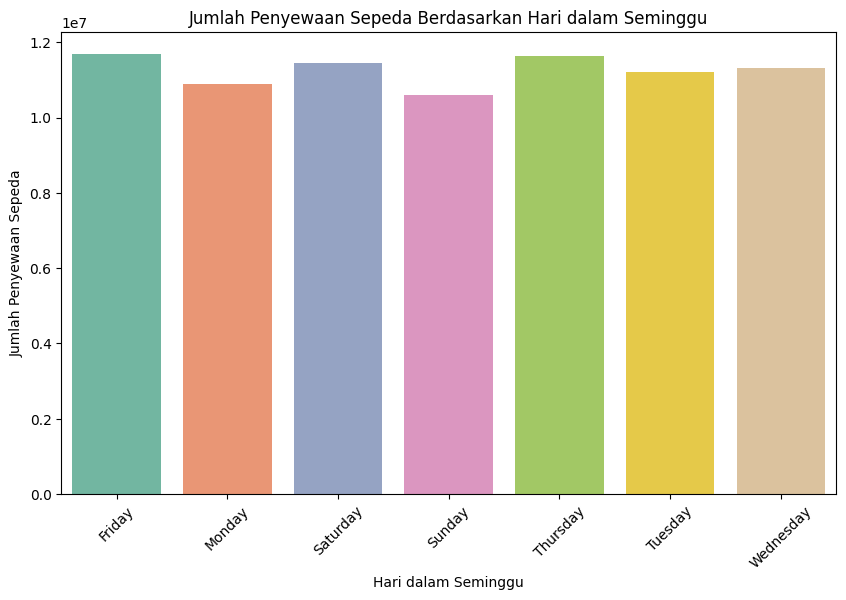

In [544]:
# Agregasi jumlah penyewaan berdasarkan hari dalam seminggu
day_of_week_summary = bikes_df.groupby('day_of_week')['total_rentals'].sum().reset_index()

# Visualisasi jumlah penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='total_rentals', data=day_of_week_summary, palette='Set2')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2:Apakah Liburan (Holiday) mempengaruhi Penyewaan Sepeda?

<ipython-input-545-ee2032675878>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_holiday', y='total_rentals', data=holiday_summary, palette='RdBu')


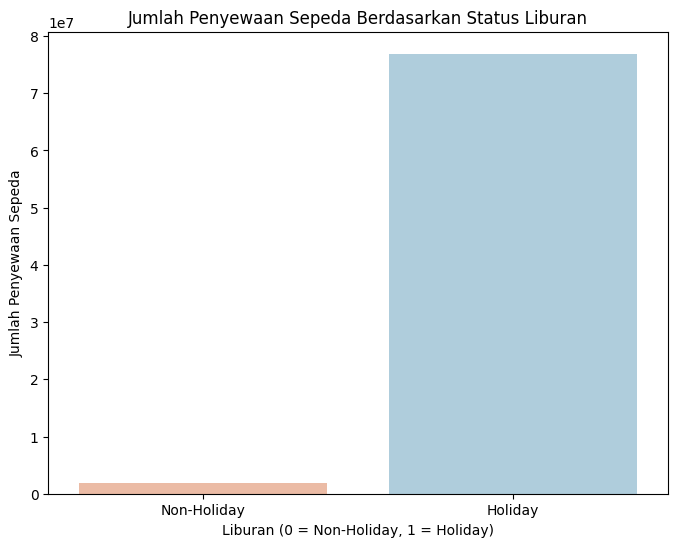

In [545]:
# Agregasi jumlah penyewaan berdasarkan status liburan
holiday_summary = bikes_df.groupby('is_holiday')['total_rentals'].sum().reset_index()

# Visualisasi jumlah penyewaan berdasarkan status liburan
plt.figure(figsize=(8, 6))
sns.barplot(x='is_holiday', y='total_rentals', data=holiday_summary, palette='RdBu')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Status Liburan')
plt.xlabel('Liburan (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


### Pertanyaan 3:Perbedaan penyewaan sepeda Hari Kerja vs. Non-Hari Kerja?

<ipython-input-546-ada58b39b6cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_working_day', y='total_rentals', data=working_day_summary, palette='Pastel1')


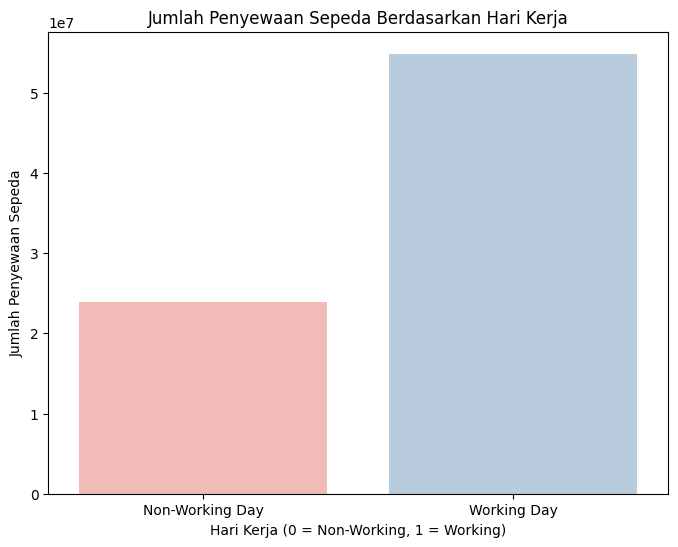

In [546]:
# Agregasi jumlah penyewaan berdasarkan hari kerja
working_day_summary = bikes_df.groupby('is_working_day')['total_rentals'].sum().reset_index()

# Visualisasi jumlah penyewaan berdasarkan hari kerja
plt.figure(figsize=(8, 6))
sns.barplot(x='is_working_day', y='total_rentals', data=working_day_summary, palette='Pastel1')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0 = Non-Working, 1 = Working)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.show()

### Pertanyaan 4:bagaimana tren dalam satuan Tahun (Year) Penyewaan Sepeda?

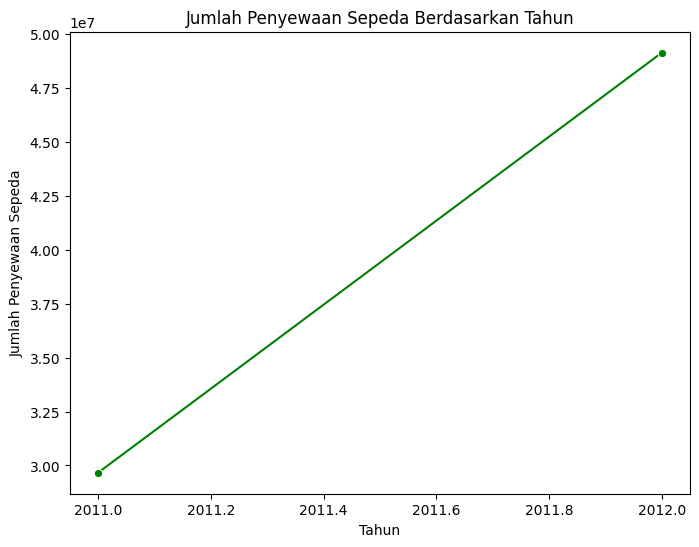

In [547]:
# Agregasi jumlah penyewaan berdasarkan tahun
year_summary = bikes_df.groupby('year')['total_rentals'].sum().reset_index()

# Visualisasi jumlah penyewaan berdasarkan tahun
plt.figure(figsize=(8, 6))
sns.lineplot(x='year', y='total_rentals', data=year_summary, marker='o', color='green')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


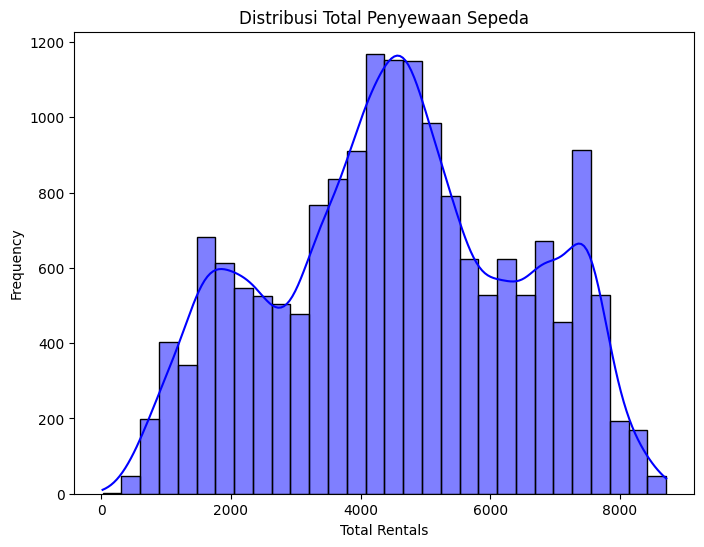

In [548]:
#Distribusi Penyewaan Sepeda (Total Rentals)
plt.figure(figsize=(8, 6))
sns.histplot(bikes_df['total_rentals'], bins=30, kde=True, color='blue')
plt.title('Distribusi Total Penyewaan Sepeda')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Jam')

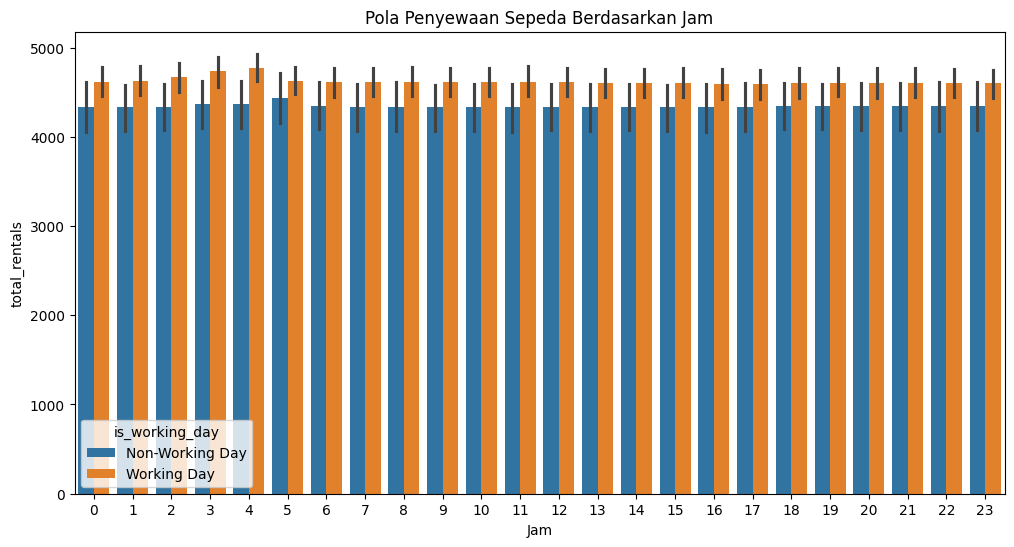

In [549]:
#Pola Penyewaan Sepeda Berdasarkan Jam
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='total_rentals', hue='is_working_day', data=bikes_df)
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')

### Pertanyaan 5:Bagaimana perbandingan Casual dan Registered Users Berdasarkan Jumlah Penyewaan Sepeda?

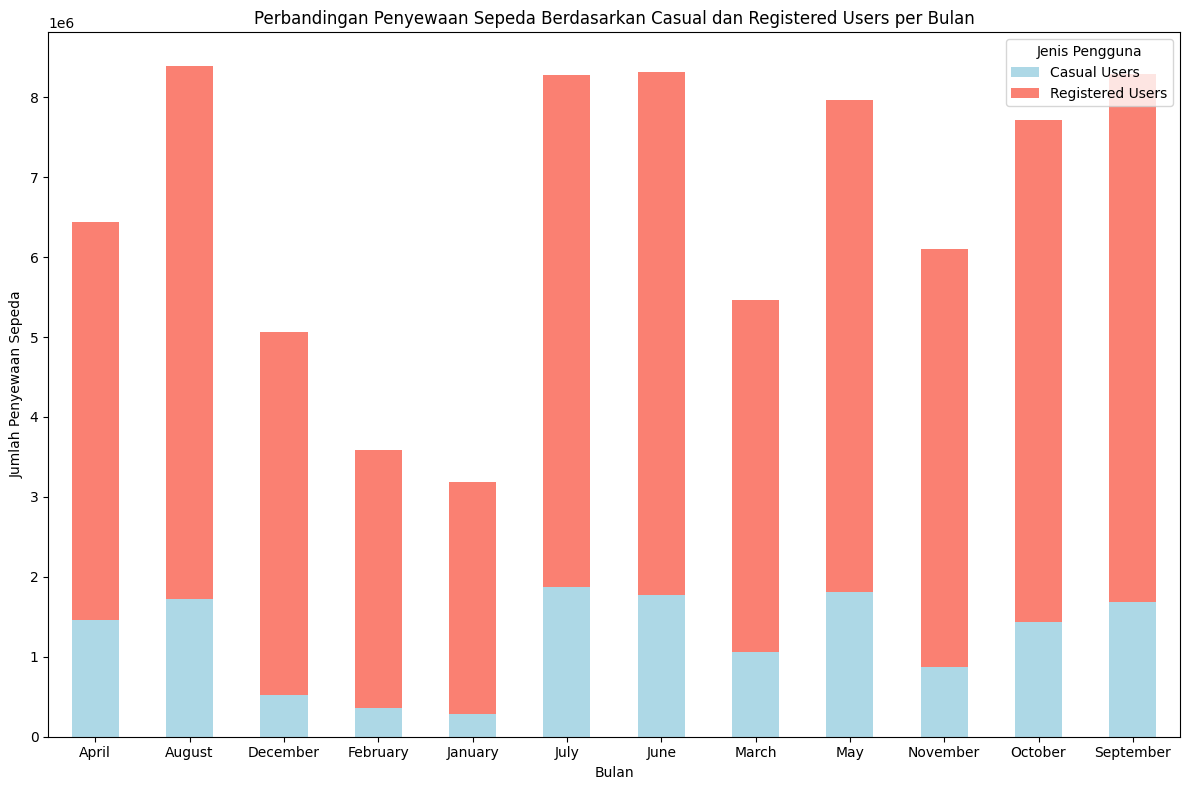

In [550]:
# Menambahkan kolom jumlah penyewaan berdasarkan casual dan registered
bikes_df['total_users'] = bikes_df['casual_users'] + bikes_df['registered_users']

# Visualisasi perbandingan penyewaan per kategori pengguna per bulan
monthly_rentals = bikes_df.groupby('month')[['casual_users', 'registered_users']].sum()

# Plot Stacked Bar Chart
monthly_rentals.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightblue', 'salmon'])

# Menambahkan informasi ke plot
plt.title('Perbandingan Penyewaan Sepeda Berdasarkan Casual dan Registered Users per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=0)
plt.legend(title='Jenis Pengguna', labels=['Casual Users', 'Registered Users'])
plt.tight_layout()
plt.show()


**Insight:**
*   Penyewaan sepeda dapat bervariasi signifikan berdasarkan hari dalam seminggu.Pada hari Kamis dan Jum'at,penyewaan sepeda cenderung lebih tinggi karena banyak orang yang menghabiskan waktu di luar untuk beraktivitas.
*   Liburan (holiday) cenderung sangat berpengaruh pada jumlah penyewaan sepeda, dengan kemungkinan lebih banyak orang yang menyewa sepeda karena memiliki waktu luang. Ini bisa menunjukkan adanya fluktuasi yang lebih tinggi pada hari-hari libur dibandingkan dengan hari biasa, ketika orang lebih cenderung menggunakan sepeda untuk rekreasi
*   Perbedaan antara penyewaan sepeda di hari kerja (weekday) dan non-hari kerja (weekend) sangat jelas. Hari kerja biasanya memiliki penyewaan yang lebih teratur karena orang lebih banyak menggunakan sepeda untuk transportasi, sementara pada hari libur atau akhir pekan, penyewaan lebih didorong oleh aktivitas rekreasi.
*   Penyewaan sepeda akan mengalami perubahan yang signifikan dari tahun 2011 ke 2012,ada kemungkinan peningkatan jumlah penyewaan sepeda di tahun-tahun tertentu, yang bisa dipengaruhi oleh faktor eksternal
*   Casual users (pengguna yang tidak terdaftar) dan registered users (pengguna yang terdaftar) memiliki pola penyewaan yang berbeda. Casual users cenderung menggunakan sepeda lebih sedikit pada akhir pekan atau selama liburan, sedangkan registered users cenderung menyewa sepeda secara lebih konsisten di hari kerja.

## Analisis Lanjutan (Clusterung):Bagaimana kita dapat mengidentifikasi periode waktu dengan permintaan tinggi dan rendah untuk optimasi operasional?

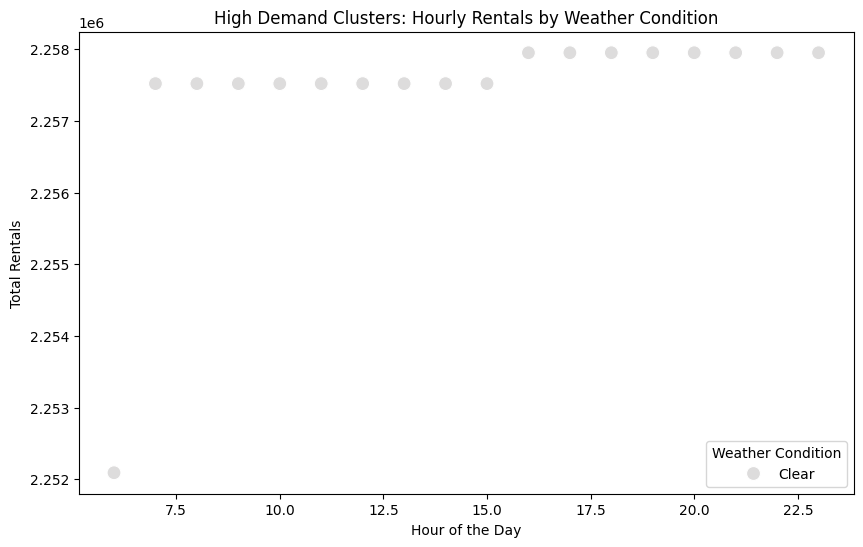

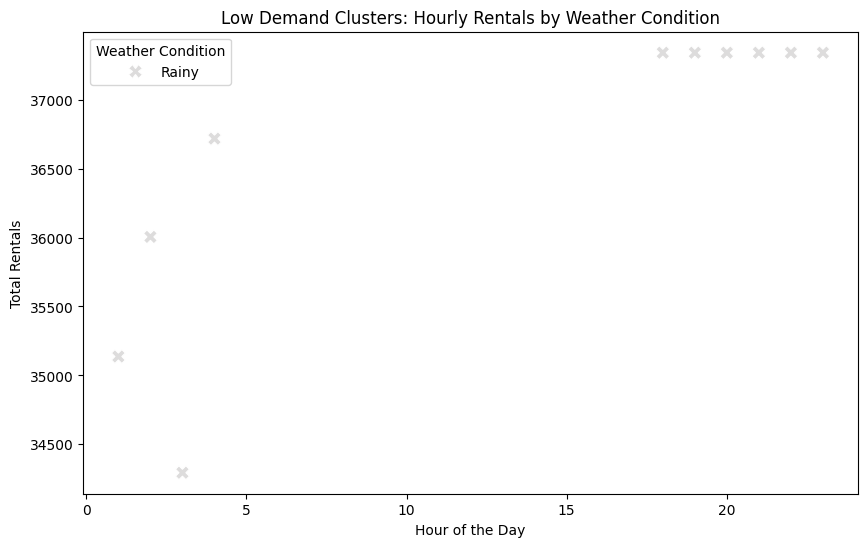

In [551]:
# Visualisasi high demand dan low demand clusters
plt.figure(figsize=(10, 6))

# Plot untuk High Demand Clusters
sns.scatterplot(data=high_demand, x='hour', y='total_rentals', hue='weather_condition', palette='coolwarm', s=100)
plt.title('High Demand Clusters: Hourly Rentals by Weather Condition')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Condition')
plt.show()

# Plot untuk Low Demand Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=low_demand, x='hour', y='total_rentals', hue='weather_condition', palette='coolwarm', s=100, marker='X')
plt.title('Low Demand Clusters: Hourly Rentals by Weather Condition')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Condition')
plt.show()


## Conclusion




*   Liburan (holiday) memang memengaruhi peningkatan penyewaan sepeda, yang menunjukkan permintaan lebih tinggi di hari libur.Pengelolaan armada sepeda dan promosi untuk meningkatkan jumlah penyewaan pada hari libur harus dilakukan. Penyesuaian pada ketersediaan sepeda dan layanan sebaiknya dilakukan lebih awal.
---
*   Di hari kerja, lebih banyak sepeda yang digunakan untuk keperluan transportasi, sehingga perlu dipastikan ketersediaan sepeda di pagi dan sore hari. Untuk hari libur, bisa difokuskan pada peningkatan promosi atau event yang menarik lebih banyak pengguna casual.

---
*   Penyewaan sepeda cenderung meningkat dari tahun ke tahun, menunjukkan peningkatan kesadaran masyarakat untuk menggunakan sepeda.ini diperlukan perencanaan jangka panjang, termasuk penambahan jumlah sepeda dan penyempurnaan sistem operasional untuk mengikuti tren yang meningkat

---
*   Memahami pola penyewaan sepeda berdasarkan waktu (jam, hari, bulan, tahun) dan kondisi cuaca dapat membantu dalam pengelolaan armada sepeda. Optimalkan ketersediaan sepeda pada jam-jam sibuk, hari libur, dan periode dengan cuaca cerah.


In [503]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [504]:
# Menyimpan dataframe ke CSV di Google Drive
bikes_df.to_csv('/content/drive/MyDrive/bike_sharing_dataset.csv', index=False)
print("Dataframe berhasil disimpan ke Google Drive.")

Dataframe berhasil disimpan ke Google Drive.


In [505]:
from google.colab import files
files.download('/content/drive/MyDrive/bike_sharing_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>